**LGMVIP -Data Science Intern**

**Intermidiate Level Task 2 - Exploratory Data Analysis on Dataset -Terrorism**

**Author - Kavita Dnyanoba Samdade**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='latin1')

In [ ]:
data.shape

(11960, 135)

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
11955,198009300011,1980,9,30,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
11956,198009300012,1980,9,30,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
11957,198009300013,1980,9,30,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
11958,198009300014,1980,9,30,NaN,0,NaN,83,Guatemala,2,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
11959,198009300015,1980,9,30,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear' : 'Year', 'imonth' :'Month','iday' : 'day','gname' : 'Group','country_txt':'Country','region_txt' : 'Region' , 'provstate':'State' , 'city' :'City' ,'latitude':'Latitude','longitude':'Longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound'}, inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','Latitude','Longitude','Attacktype','kill', 'Wound', 'target1','summary','Group','Targettype','Weapon', 'motive']]

In [ ]:
data.head()

,Year,Month,day,Country,State,Region,City,Latitude,Longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape

(11960, 18)

In [ ]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            42
Region            0
City              0
Latitude        390
Longitude       390
Attacktype        0
kill           1535
Wound          2865
target1         118
summary       11072
Group             1
Targettype        0
Weapon            1
motive        11337
dtype: int64

In [ ]:
data['Wound'] =data['Wound'] .fillna(0)
data['kill'] = data['kill'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        11960 non-null  int64  
 1   Month       11960 non-null  int64  
 2   day         11960 non-null  int64  
 3   Country     11960 non-null  object 
 4   State       11918 non-null  object 
 5   Region      11960 non-null  object 
 6   City        11960 non-null  object 
 7   Latitude    11570 non-null  float64
 8   Longitude   11570 non-null  float64
 9   Attacktype  11960 non-null  object 
 10  kill        11960 non-null  float64
 11  Wound       11960 non-null  float64
 12  target1     11842 non-null  object 
 13  summary     888 non-null    object 
 14  Group       11959 non-null  object 
 15  Targettype  11960 non-null  object 
 16  Weapon      11959 non-null  object 
 17  motive      623 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,Year,Month,day,Latitude,Longitude,kill,Wound
count,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,11960.000000
mean,1976.726338,6.170569,15.243227,31.330726,-22.842727,0.879097,0.934783
std,3.024931,3.338024,8.942614,22.026742,54.525074,5.929225,6.850653
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000
25%,1975.000000,3.000000,8.000000,14.622869,-75.416953,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,39.930771,-5.956210,0.000000,0.000000
75%,1979.000000,9.000000,23.000000,45.434336,11.346518,1.000000,0.000000
max,1980.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000


In [ ]:
data['Year'].value_counts().sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2046
Name: Year, dtype: int64

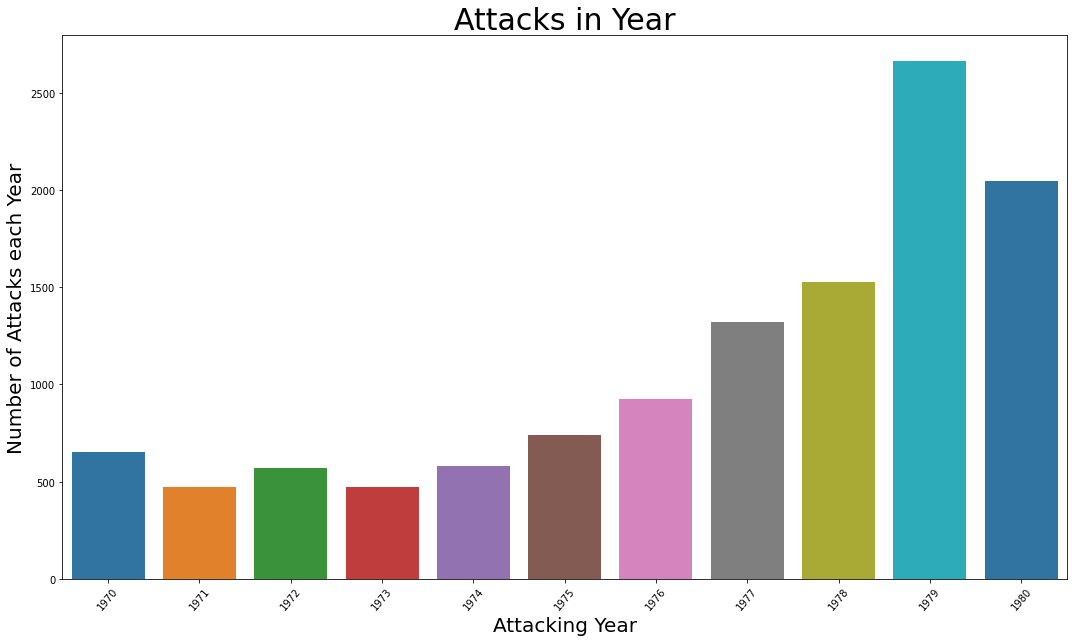

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x = year,
            y=years_count,
            palette= "tab10")
plt.xticks(rotation=50)
plt.xlabel("Attacking Year", fontsize = 20)
plt.ylabel("Number of Attacks each Year", fontsize = 20)
plt.title("Attacks in Year", fontsize = 30)
plt.show()

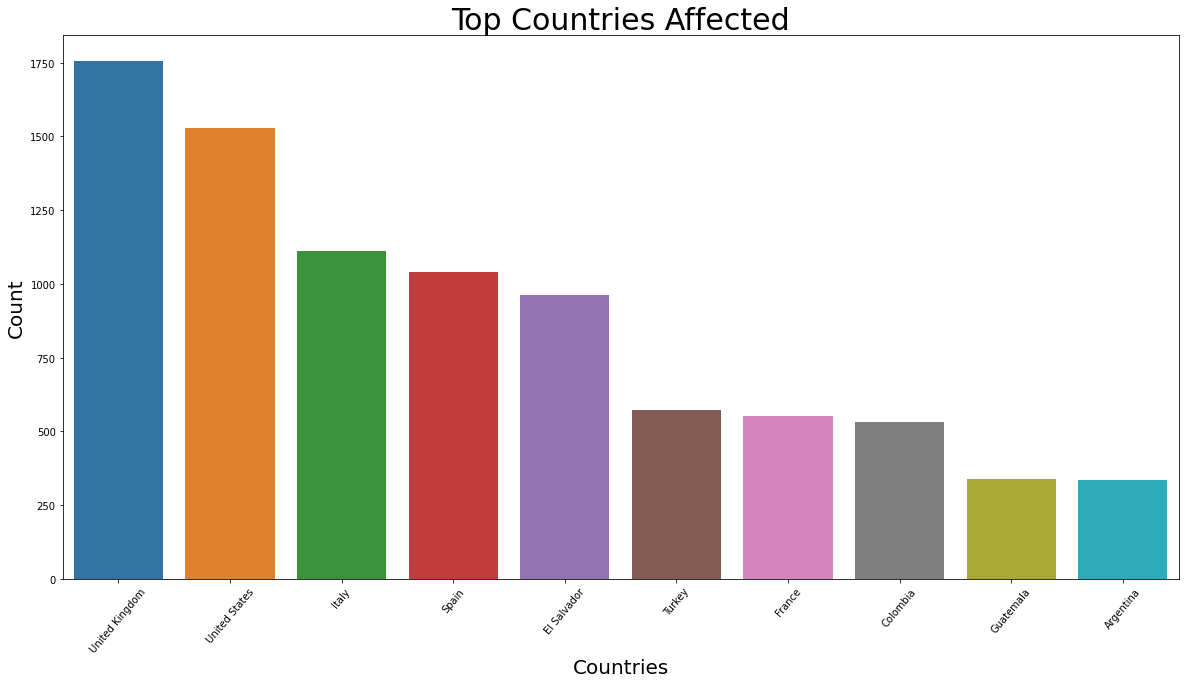

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index, data['Country'].value_counts()[:10].values, palette='tab10')
plt.title("Top Countries Affected" ,fontsize =30)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation =50)
plt.show()

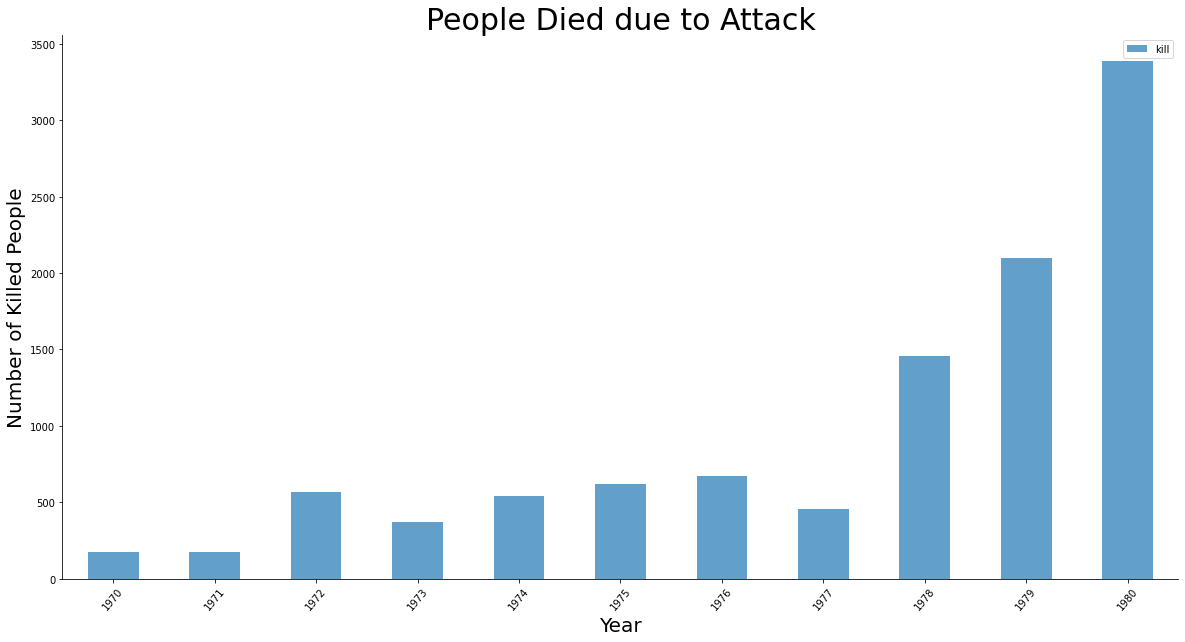

In [ ]:
df=data[['Year' , 'kill']].groupby(['Year']).sum()
fig, ax4 =plt.subplots(figsize=(20,10))
df.plot(kind ='bar' ,alpha=0.7 ,ax =ax4)
plt.xticks(rotation=50)
plt.title('People Died due to Attack' ,fontsize=30)
plt.ylabel("Number of Killed People", fontsize=20)
plt.xlabel('Year', fontsize =20)
top_side=ax4.spines["top"]
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

Text(0.5, 1.0, 'Number of Wounded')

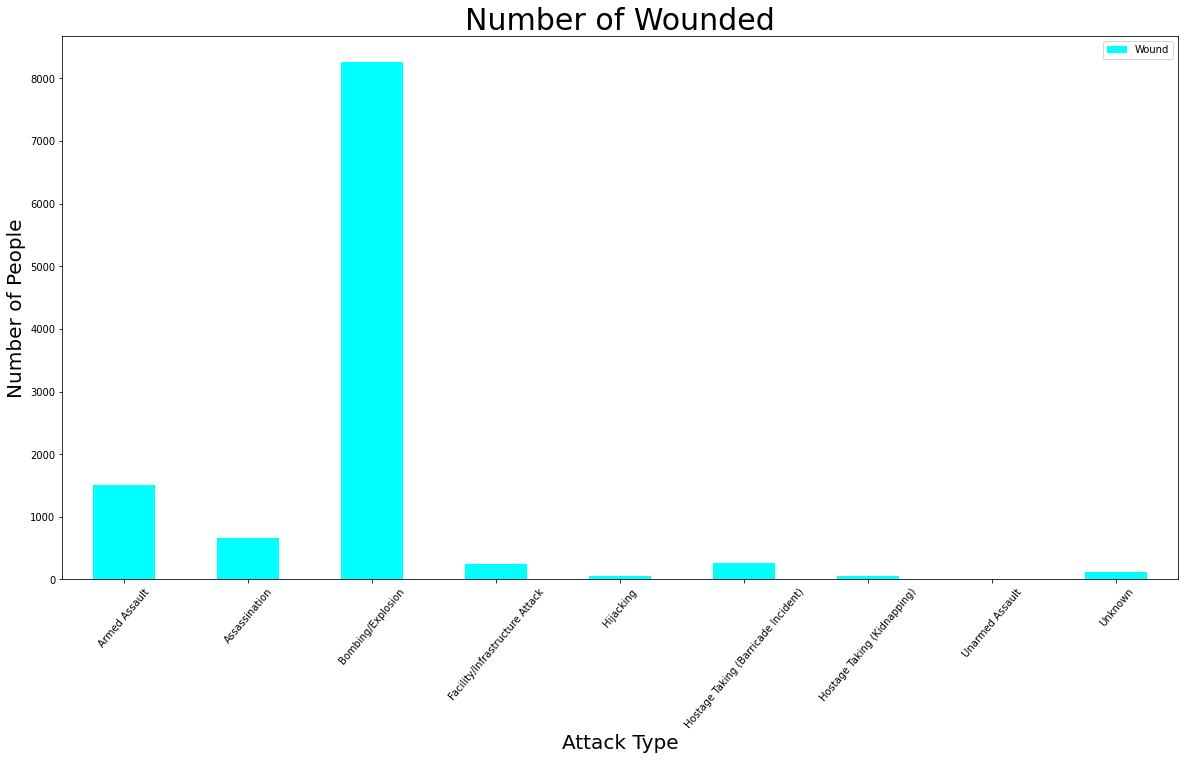

In [ ]:
data[['Attacktype' , 'Wound']] .groupby(['Attacktype'],axis=0).sum().plot(kind='bar' ,figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.xlabel("Attack Type", fontsize=20)
plt.ylabel("Number of People", fontsize=20)
plt.title("Number of Wounded", fontsize=30)

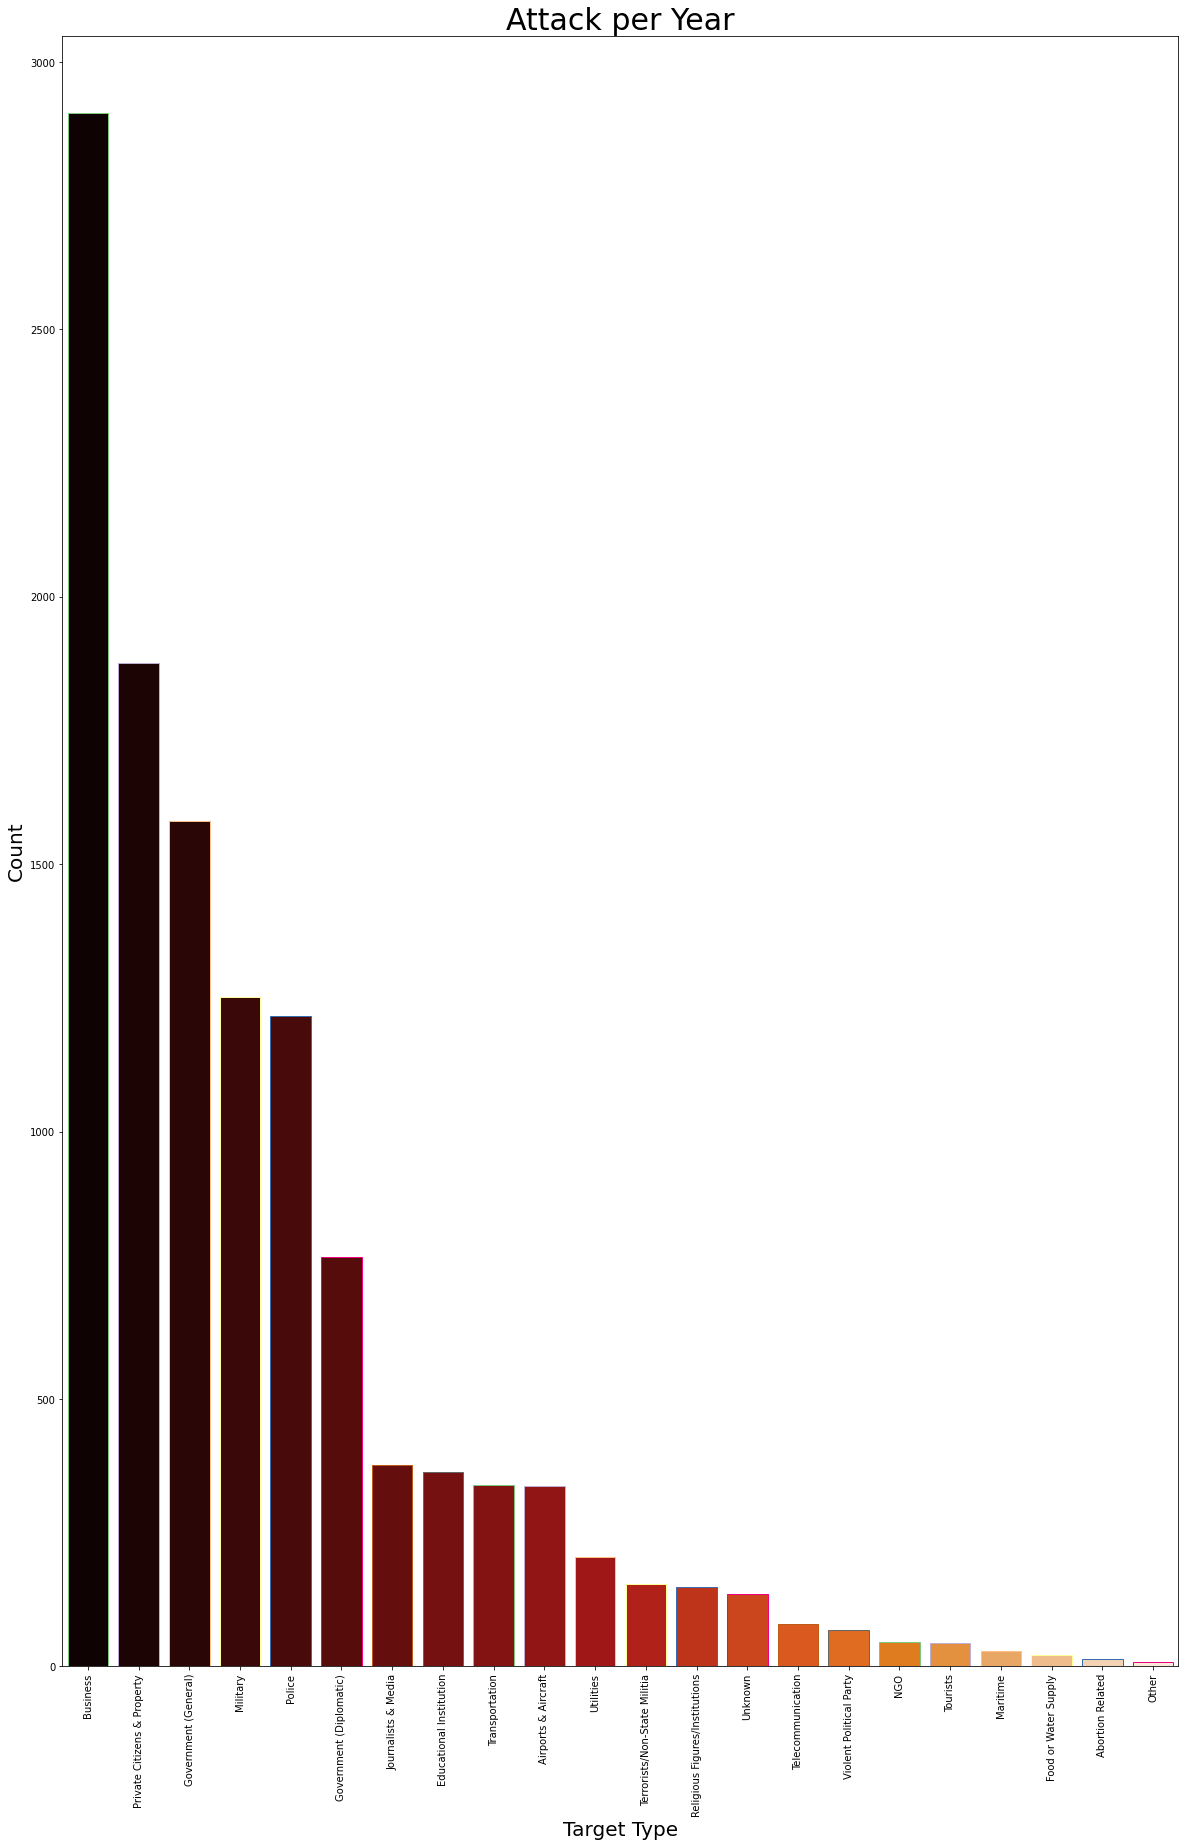

In [ ]:
plt.subplots(figsize=(20,30))
sns.countplot(data['Targettype'], order = data['Targettype'].value_counts().index, palette='gist_heat',edgecolor=sns.color_palette("Accent"))
plt.xticks(rotation=90)
plt.xlabel("Target Type" , fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Attack per Year", fontsize=30)
plt.show()

Text(0.5, 1.0, 'Top 10 Terrorist Groups of Attack')

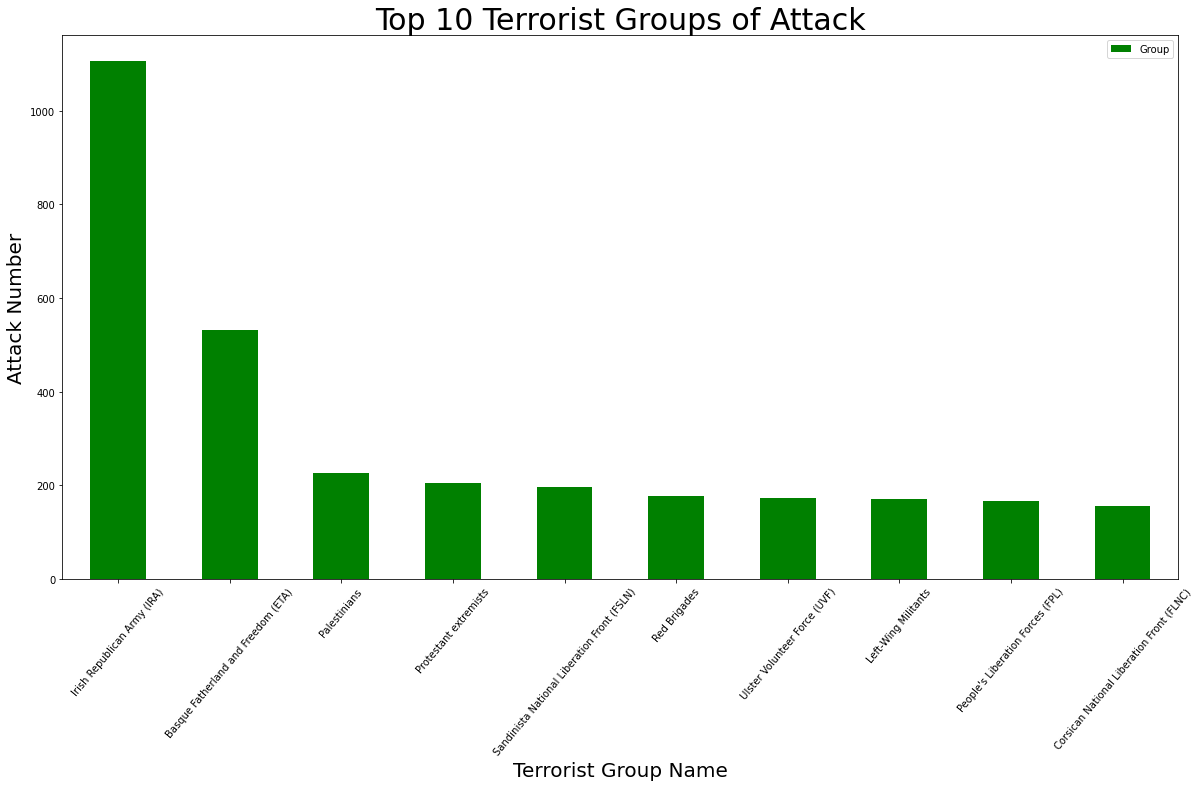

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel("Terrorist Group Name", fontsize=20)
plt.ylabel("Attack Number", fontsize=20)
plt.title("Top 10 Terrorist Groups of Attack", fontsize=30)

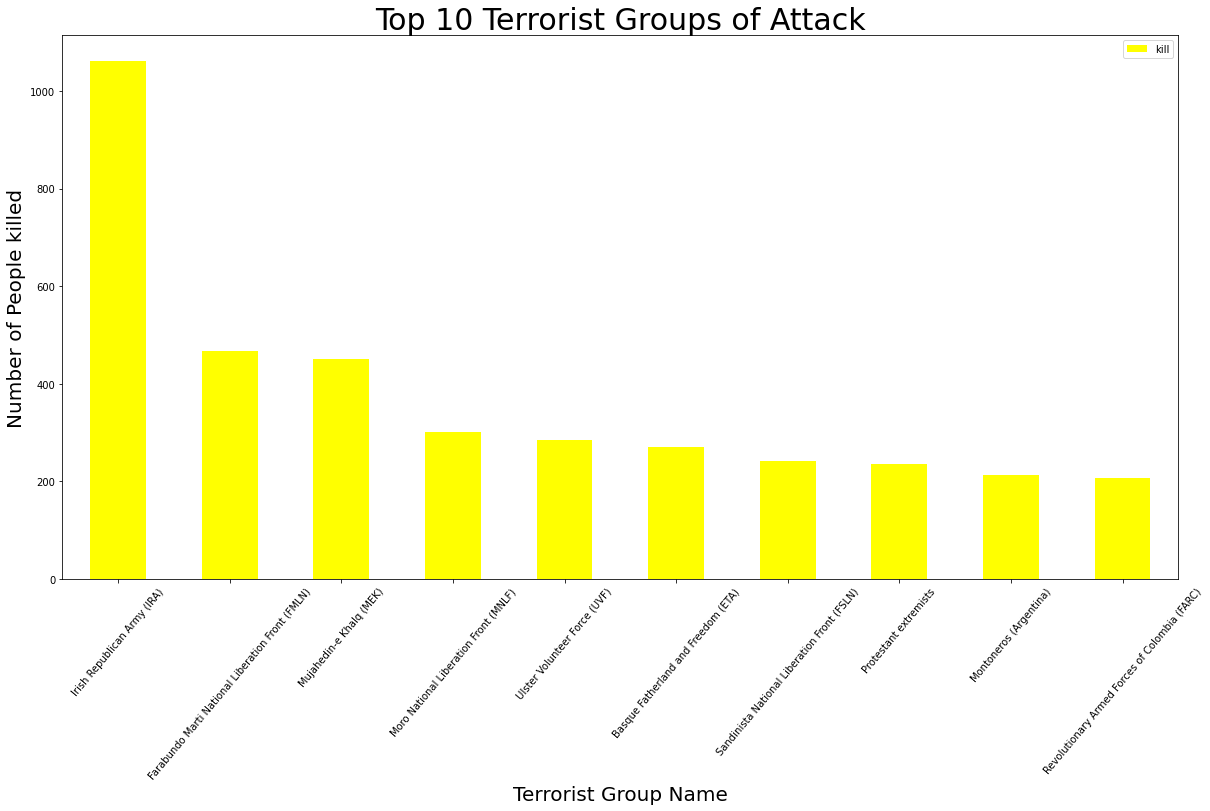

In [ ]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill' , ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel("Terrorist Group Name", fontsize=20)
plt.ylabel("Number of People killed", fontsize=20)
plt.title("Top 10 Terrorist Groups of Attack", fontsize=30)
plt.show()

In [ ]:
df=data[['Group', 'Country','kill']]
df =df.groupby(['Group', 'Country'], axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,1027.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,466.0
2,Mujahedin-e Khalq (MEK),Iran,449.0
3,Moro National Liberation Front (MNLF),Philippines,302.0
4,Basque Fatherland and Freedom (ETA),Spain,269.0
5,Ulster Volunteer Force (UVF),United Kingdom,247.0
6,Sandinista National Liberation Front (FSLN),Nicaragua,238.0
7,Protestant extremists,United Kingdom,232.0
8,Montoneros (Argentina),Argentina,212.0
9,Revolutionary Armed Forces of Colombia (FARC),Colombia,207.0


In [ ]:
kill= data.loc[:,'kill']
print("Number of People killed by Terror Attack:: ", int(sum(kill.dropna())))

Number of People killed by Terror Attack::  10514


In [ ]:
type_kill= data.pivot_table(columns="Attacktype", values='kill', aggfunc='sum')
type_kill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,3598.0,2520.0,2762.0,513.0,175.0,206.0,271.0,16.0,453.0


In [ ]:
country_kill= data.pivot_table(columns="Country", values='kill', aggfunc='sum')
country_kill

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,...,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,19.0,328.0,3.0,9.0,0.0,0.0,6.0,...,195.0,4.0,3.0,38.0,59.0,0.0,2.0,1.0,5.0,4.0


**Conclusion and Results**

1.Country with Most Attacks: United Kingdom.

2.City with Most Attacks: United Kingdom.

3.Year with the Most Attacks: 1979.

4.Group with  the Most Attacks: Irish Republican Army (IRA).

5.Most Attack Types: Armed Assault.

6.Group with the Most Number of Killed People: Irish Republican Army (IRA).
